In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv('medical_record_diabetes.csv')

In [3]:
dataset.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1


In [5]:
dataset.shape

(768, 8)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [8]:
counts=dataset["Outcome"].value_counts()
counts

Outcome
0    500
1    268
Name: count, dtype: int64

In [9]:
X=dataset.iloc[:,0:7]
Y=dataset.iloc[:,7]


In [10]:
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33


In [11]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

In [15]:
from sklearn import tree

In [17]:
clf=tree.DecisionTreeClassifier()

In [18]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
y_pred=clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [20]:
y_pred_df=pd.DataFrame(y_pred,columns=["Predicted_value"])
y_pred_df
                                       
        
                                
                                       

,Predicted_value
0,0
1,0
2,0
3,0
4,1
...,...
187,0
188,0
189,0
190,0


In [21]:
y_test_df=pd.DataFrame(y_test)
y_test_df.head()

,Outcome
520,0
273,0
420,0
145,0
300,1


In [22]:
y_test_df=y_test_df.reset_index(drop=True)
y_test_df.head()

,Outcome
0,0
1,0
2,0
3,0
4,1


In [23]:
result_df=pd.concat([y_test_df,y_pred_df],axis=1)
result_df

,Outcome,Predicted_value
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
187,0,0
188,0,0
189,0,0
190,0,0


In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[95, 33],
       [26, 38]])

In [26]:
import seaborn as sn

<Axes: xlabel='Actual', ylabel='Predicted'>

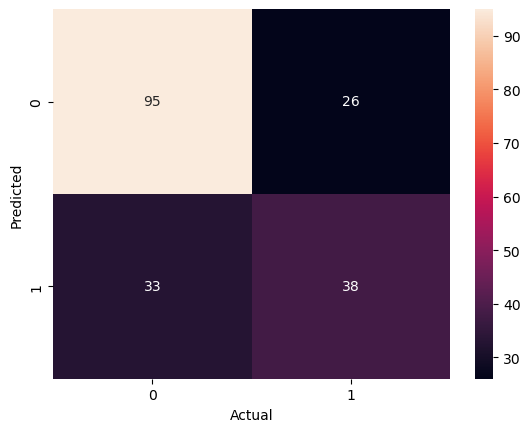

In [30]:
data={'y_Actual':y_test,'y_Predicted':y_pred}
df=pd.DataFrame(data,columns=['y_Actual','y_Predicted'])
df_confusion_matrix=pd.crosstab(df['y_Predicted'],df['y_Actual'],rownames=['Predicted'],colnames=['Actual'])
sn.heatmap(df_confusion_matrix,annot=True)

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
clf2=RandomForestClassifier(n_estimators=200)

In [35]:
clf2.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [36]:
y_pred_rf=clf2.predict(X_test)

In [37]:
confusion_matrix(y_test,y_pred_rf)

array([[102,  26],
       [ 22,  42]])

<Axes: xlabel='Actual', ylabel='Predicted'>

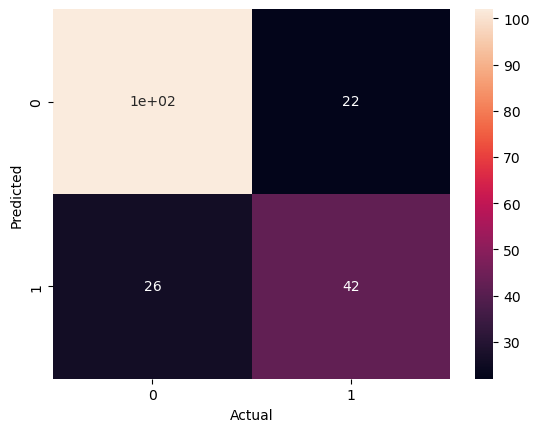

In [38]:
import seaborn as sn
data={'y_Actual':y_test,'y_Predicted':y_pred_rf}
df=pd.DataFrame(data,columns=['y_Actual','y_Predicted'])
df_confusion_matrix=pd.crosstab(df['y_Predicted'],df['y_Actual'],rownames=['Predicted'],colnames=['Actual'])
sn.heatmap(df_confusion_matrix,annot=True)

In [40]:
import joblib
joblib.dump(clf2,'diabetes_rf.pkl')

['diabetes_rf.pkl']